## Figure 8. from [arXiv:1505.03867](https://inspirehep.net/search?p=find+eprint+1505.03867)
<img src="https://inspirehep.net/record/1370447/files/lowmass_1_m20.png">

### Launch virtual docker image: 

[![Binder](http://mybinder.org/badge.svg)](http://mybinder.org/repo/restrepo/fill_scatter)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import numpy as np
import pandas as pd
import numpy.polynomial.polynomial as poly
from pareto import *

In [3]:
#for better plots
plt.rcParams.update({'font.size': 15}) 

data

In [4]:
xd = pd.read_csv('xdtan20y-1_join_modificado.csv')

### DM relic density 
$\Omega h^2 \approx 0.1199 \pm 0.0027$   according with PlancK 2015 results

In [5]:
#Experimental values for DM
#Reals values 2015
e= 3   # e sigmas CL
Omega_max=0.1199 + e*0.0027
Omega_min=0.1199 - e*0.0027

xdmax=xd[xd['Omega']> Omega_max]
xdmin=xd[xd['Omega']< Omega_min]
xdDM=xd[np.logical_and(xd['Omega']> Omega_min,xd['Omega']< Omega_max)]

### Higgs invisible
$Br(h \rightarrow \chi_i^0\chi_j^0) < 0.19$

In [6]:
#Bigger is exclude
xdHinv=xd[xd['BR(h->XX)'] > 0.19]

## Pareto rutine

In [7]:
%%writefile pareto.py
def pareto_frontier(Xs, Ys, maxX = True, maxY = True):
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
# Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y
                p_front.append(pair) # and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y
                p_front.append(pair) # and add them to the Pareto frontier
# Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

Writing pareto.py


In [9]:
#contours for the higgs invisible 
xdHinv1=xdHinv[xdHinv['MN']>25]
XH1a,YH1a = pareto_frontier(xdHinv1['MDF'].values,xdHinv1['MN'].values,True,True)
XH1b,YH1b = pareto_frontier(xdHinv1['MDF'].values,xdHinv1['MN'].values,True,False)
xdHinv2=xdHinv[xdHinv['MN']<25]
XH2a,YH2a = pareto_frontier(xdHinv2['MDF'].values,xdHinv2['MN'].values,True,True)
XH2b,YH2b = pareto_frontier(xdHinv2['MDF'].values,xdHinv2['MN'].values,False,True)

#Higgs line
xdHline=xd[np.logical_and(xd['M_DM']>62,xd['M_DM']<64)]

XHl,YHl = pareto_frontier(xdHline['MDF'].values,xdHline['MN'].values,True,True)

## Z invisible decay


\begin{equation}
\Gamma(Z \rightarrow \tilde{\chi_m}^0 \chi_n^0)=\dfrac{M_Z}{6\pi}\bigg(1-\dfrac{4 M_{\chi}^2}{M_Z^2}\bigg)^{3/2}\
\big(\dfrac{g}{4 cw}(U_{m3}U_{n3}^*-U_{m2}U_{n2}^*)\big)^2
\end{equation}

In [10]:
y=xd[['Mchi1','Mchi2','Mchi3','M_DM','N21','N22','N23','N31','N32','N33']]

In [11]:
%%writefile GZ_decay_T13A.py

# It takes a pandas.core.frame.DataFrame something like: 
#y=xd[['Mchi1','Mchi2','Mchi3','M_DM','N21','N22','N23','N31','N32','N33']]

import numpy as np
import pandas as pd

def z_decay(y):
    
    Z_Decay=[]
    y=np.asarray(y)
    
    MZ = 91.1876
    gw = 0.6483971671950267
    cw = 0.8753861242778386   
    
    for i in range(0,len(y)):
        #M_DM=y[i,3]
        if MZ > 2*y[i,3]:
            
            if y[i,3] == np.abs(y[i,0]):
                
                gammaZ = MZ/(6.*np.pi)*(1.-4*(y[i,3]/MZ)**2)**(3./2.)*(gw/(4.*cw)*(y[i,7]**2-y[i,4]**2))**2  
                
            if y[i,3] == np.abs(y[i,1]):
                
                gammaZ = MZ/(6.*np.pi)*(1.-4*(y[i,3]/MZ)**2)**(3./2.)*(gw/(4.*cw)*(y[i,8]**2-y[i,5]**2))**2   
                
            if y[i,3] == np.abs(y[i,2]):
                
                gammaZ = MZ/(6.*np.pi)*(1.-4*(y[i,3]/MZ)**2)**(3./2.)*(gw/(4.*cw)*(y[i,9]**2-y[i,6]**2))**2                   
        else:
            gammaZ = 0.
        
        Z_Decay.append([gammaZ])
    
    zd=pd.DataFrame(Z_Decay,columns=['Z_Decay'])
    
    return  zd

Writing GZ_decay_T13A.py


### Cut using Z_decay $> 3$ MeV is exclude

In [12]:
from GZ_decay_T13A import *

#Add to the pandas array
xd['GZ_Decay']=z_decay(y)

xdZinv=xd[xd['GZ_Decay'] > 0.003]

#Z invisible contourn
XZ,YZ = pareto_frontier(xdZinv['MDF'].values,xdZinv['MN'].values,True,True)

### LUX constraint

In [13]:
from indirectdirect import *

In [14]:
xd['sigmaSI_f']=sigmaSI_LUX_f(xd.M_DM)   

#Without scalling
zsi_ws=xd[xd.SI>xd.sigmaSI_f] # LUX   

##Lux contours for Cross section SI
XSIlux1,YSIlux1 = pareto_frontier(zsi_ws['MDF'].values,zsi_ws['MN'].values,True,False)
XSIlux2,YSIlux2 = pareto_frontier(zsi_ws['MDF'].values,zsi_ws['MN'].values,False,False)

### STU: based on  http://arxiv.org/abs/0705.4493

In [15]:
from stu_sdfdm import *

In [16]:
xd['T']=stumap_new(xd['MN'],xd['MDF'],xd['lam'],xd['tanb'],vev=246.2,sw=np.sqrt(0.23),gg=0.653,LAMBDA=1E16)

STU=xd[np.abs( xd['T']-0.0 )<0.2]

## T contours 
XTc,YTc = pareto_frontier(STU['MDF'].values, STU['MN'].values,False,False)

### Fits to the contours

In [40]:
x_newt = np.linspace(XTc[0], XTc[-1], num=len(XTc)*10)
coefst = np.polyfit(XTc, YTc, 3)
ffitt = np.polyval(np.poly1d(coefst),x_newt )

x_l1 = np.linspace(XSIlux1[0], XSIlux1[-1], num=len(XSIlux1)*10)
coefsl1 = np.polyfit(XSIlux1, YSIlux1, 5)
ffitl1 = np.polyval(np.poly1d(coefsl1),x_l1)

x_l2 = np.linspace(XSIlux2[0], XSIlux2[-1], num=len(XSIlux2)*10)
coefsl2 = np.polyfit(XSIlux2, YSIlux2, 2)
ffitl2 = np.polyval(np.poly1d(coefsl2),x_l2)

x_z = np.linspace(XZ[0], XZ[-1], num=len(XZ)*10)
coefsz = np.polyfit(XZ, YZ, 4)
ffitz = np.polyval(np.poly1d(coefsz),x_z)

x_h1a = np.linspace(XH1a[0], XH1a[-1], num=len(XH1a)*10)
coefsh1a = np.polyfit(XH1a, YH1a, 7)
ffith1a = np.polyval(np.poly1d(coefsh1a),x_h1a)

x_h1b = np.linspace(XH1b[0], XH1b[-1], num=len(XH1b)*10)
coefsh1b = np.polyfit(XH1b, YH1b, 7)
ffith1b = np.polyval(np.poly1d(coefsh1b),x_h1b)


x_h2a = np.linspace(XH2a[0], XH2a[-1], num=len(XH2a)*10)
coefsh2a = np.polyfit(XH2a, YH2a, 4)
ffith2a = np.polyval(np.poly1d(coefsh2a),x_h2a)

x_h2b = np.linspace(XH2b[0], XH2b[-1], num=len(XH2b)*10)
coefsh2b = np.polyfit(XH2b, YH2b, 4)
ffith2b = np.polyval(np.poly1d(coefsh2b),x_h2b)

# PLOT

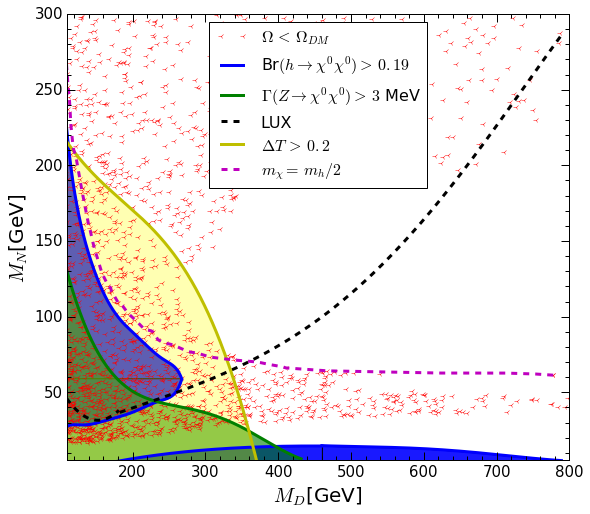

In [41]:
plt.figure(figsize=(9,8))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

##DM
plt.plot(xdmin['MDF'], xdmin['MN'], 'r3',label=r'$\Omega\, <\, \Omega_{DM}$')
#H-invisible
plt.plot(x_h1a,ffith1a,'b-',lw=3,label=r'Br$(h \rightarrow \chi^0\chi^0) >\, 0.19$')
plt.plot(x_h1b,ffith1b,'b-',lw=3)
plt.plot(x_h2a,ffith2a,'b-',lw=3)
plt.plot(x_h2b,ffith2b,'b-',lw=3)
plt.fill_between(x_h1a,ffith1a.min(),ffith1a, facecolor='blue', alpha=0.9)
plt.fill_between(x_h1b,ffith1a.min(),ffith1b, facecolor='blue', alpha=0.9)
plt.fill_between(x_h2a,0,ffith2a, facecolor='blue', alpha=0.9)
plt.fill_between(x_h2b,0,ffith2b, facecolor='blue', alpha=0.9)


#plt.plot(XZ,YZ,'g-',linewidth=3) 
plt.plot(x_z,ffitz,'g-',lw=3,label=r'$\Gamma(Z\rightarrow \chi^0\chi^0) >\, 3 $ MeV')
plt.fill_between(x_z,0,ffitz, facecolor='green', alpha=0.6)

plt.plot(x_l1,ffitl1,'k--',lw=3,label=r'LUX')
plt.plot(x_l2,ffitl2,'k--',lw=3)

#plt.plot(STU['MDF'],STU['MN'],'yo',markersize=6,label=r'$|\Delta T|<0.2$')
plt.plot(x_newt,ffitt,'y-',lw=3,label=r'$\Delta T \,>\, 0.2$')
plt.fill_between(x_newt,0,ffitt, facecolor='Yellow', alpha=0.3)

#Hline
plt.plot(XHl,YHl,'m--',lw=3,label=r'$m_{\chi}=\,m_h/2$')

plt.xlabel(r'$M_D$[GeV]',size=20)
plt.ylabel(r'$M_N$[GeV]',size=20)

plt.ylim(5,300)
plt.xlim(110,800)

plt.legend(loc='best',fontsize='16')

plt.savefig('fig8.pdf')
#plt.show()